In [27]:
import yfinance as yf
import streamlit as st
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np

%matplotlib inline


In [28]:

# Define the stock symbol for NVIDIA
stock_symbol = 'NVDA'

# Get the current date
today = datetime.today()

# Download NVIDIA stock data from 2020-01-01 to the current date
nvidia_stock = yf.download(stock_symbol, start="2020-01-01", end=today)

# Display the first few rows of the data
print(nvidia_stock.head())

# Optionally save it to a CSV file
nvidia_stock.to_csv('nvidia_stock.csv')

[*********************100%***********************]  1 of 1 completed

               Open     High      Low    Close  Adj Close     Volume
Date                                                                
2020-01-02  5.96875  5.99775  5.91800  5.99775   5.973121  237536000
2020-01-03  5.87750  5.94575  5.85250  5.90175   5.877517  205384000
2020-01-06  5.80800  5.93175  5.78175  5.92650   5.902165  262636000
2020-01-07  5.95500  6.04425  5.90975  5.99825   5.973620  314856000
2020-01-08  5.99400  6.05100  5.95375  6.00950   5.984823  277108000


In [29]:
print(nvidia_stock.size)
print(nvidia_stock.shape)



7218
(1203, 6)


<Axes: xlabel='Date'>

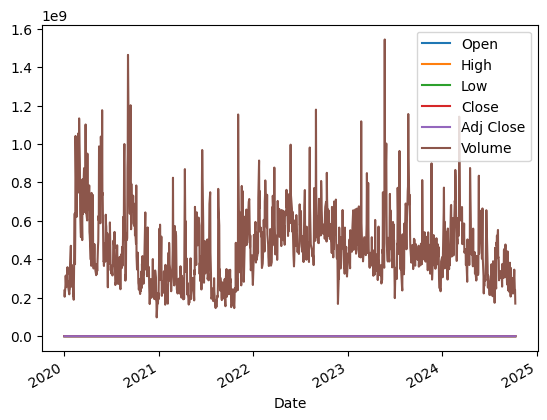

In [30]:
nvidia_stock.plot()


In [31]:
# Streamlit app title
st.title('NVIDIA Stock Trend for This Month')

# Define the stock symbol for NVIDIA
stock_symbol = 'NVDA'

# Get today's date and the start of the current month
start_of_month = today.replace(day=1)

2024-10-12 12:09:29.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:29.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


[*********************100%***********************]  1 of 1 completed
2024-10-12 12:09:30.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.058 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.060 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-12 12:09:30.060 Thread 'MainThread': miss

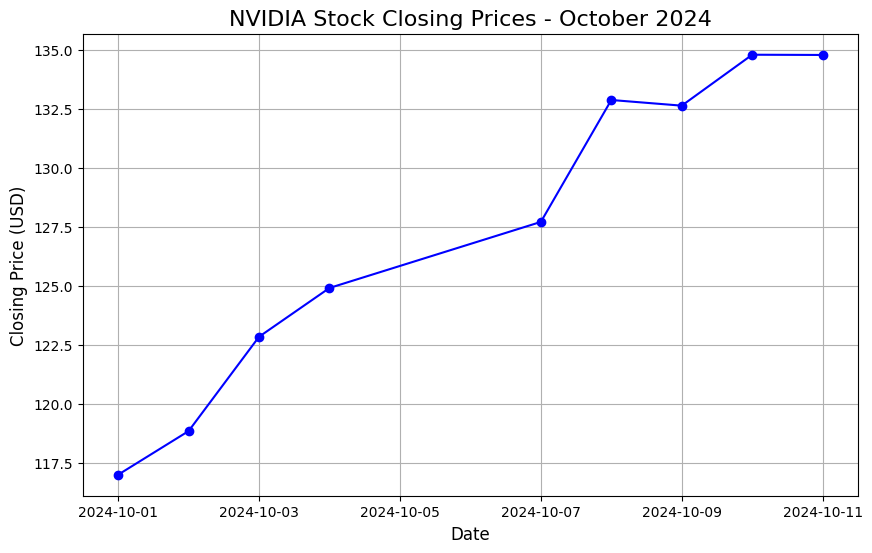

In [32]:
# Download NVIDIA stock data for this month
nvidia_stock_this_month = yf.download(stock_symbol, start=start_of_month, end=today.strftime('%Y-%m-%d'))

# Display the raw data in Streamlit
st.write(f"NVIDIA Stock Data from {start_of_month.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}")
st.dataframe(nvidia_stock_this_month)

# Check if data is available
if not nvidia_stock_this_month.empty:
    # Plot the closing prices using Matplotlib
    st.write("Closing Price Trend")

    plt.figure(figsize=(10, 6))
    plt.plot(nvidia_stock_this_month.index, nvidia_stock_this_month['Close'], marker='o', linestyle='-', color='b')
    plt.title(f'NVIDIA Stock Closing Prices - {today.strftime("%B %Y")}', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Closing Price (USD)', fontsize=12)
    plt.grid(True)

    # Render the Matplotlib plot in Streamlit
    st.pyplot(plt)
else:
    st.write("No stock data available for this month.")

In [45]:
nvidia_stock_this_month.isnull().sum()

Open         4
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

In [43]:
nvidia_stock_this_month.at[pd.Timestamp('2024-10-04 00:00:00'),'Open'] = np.nan
nvidia_stock_this_month.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-01 00:00:00,121.769997,122.440002,115.790001,117.000000,117.000000,302094500.0
2024-10-02 00:00:00,116.440002,119.379997,115.139999,118.849998,118.849998,221845900.0
2024-10-03 00:00:00,120.919998,124.360001,120.339996,122.849998,122.849998,277118000.0
2024-10-04 00:00:00,NaN,125.040001,121.830002,124.919998,124.919998,243678100.0
2024-10-07 00:00:00,124.989998,130.639999,124.949997,127.720001,127.720001,346250200.0


In [40]:
nvidia_stock_this_month.index

Index([  2024-10-01 00:00:00,   2024-10-02 00:00:00,   2024-10-03 00:00:00,
         2024-10-04 00:00:00,   2024-10-07 00:00:00,   2024-10-08 00:00:00,
         2024-10-09 00:00:00,   2024-10-10 00:00:00,   2024-10-11 00:00:00,
                           3,                     1, '2024-10-04 00:00:00'],
      dtype='object', name='Date')